In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sci378 import *

Version:  0.0.20


In [9]:
from lmfit import *

In [11]:
from glob import glob
from tqdm import tqdm

In [7]:
filenames=glob('../Sprint #3 - Parameter Fitting and Scientific Questions/data/logistic_sample_data/logistic_sample_data_*.csv')
filenames[:10]

['../Sprint #3 - Parameter Fitting and Scientific Questions/data/logistic_sample_data/logistic_sample_data_0.csv',
 '../Sprint #3 - Parameter Fitting and Scientific Questions/data/logistic_sample_data/logistic_sample_data_1.csv',
 '../Sprint #3 - Parameter Fitting and Scientific Questions/data/logistic_sample_data/logistic_sample_data_3.csv',
 '../Sprint #3 - Parameter Fitting and Scientific Questions/data/logistic_sample_data/logistic_sample_data_2.csv',
 '../Sprint #3 - Parameter Fitting and Scientific Questions/data/logistic_sample_data/logistic_sample_data_6.csv',
 '../Sprint #3 - Parameter Fitting and Scientific Questions/data/logistic_sample_data/logistic_sample_data_7.csv',
 '../Sprint #3 - Parameter Fitting and Scientific Questions/data/logistic_sample_data/logistic_sample_data_5.csv',
 '../Sprint #3 - Parameter Fitting and Scientific Questions/data/logistic_sample_data/logistic_sample_data_4.csv',
 '../Sprint #3 - Parameter Fitting and Scientific Questions/data/logistic_sample

In [12]:
def f(x,a=1,b=1,c=1,d=1):
    return a/(1+exp(-c*(x-d)))+b

In [29]:
S=Storage()
for filename in filenames:
    data=pd.read_csv(filename)
    t=data['t']
    y=data['y']
    mymodel=Model(f)   # from lmfit
    params=mymodel.make_params()
    params['a']=Parameter("a",min=0,max=1000,value=1)
    params['b']=Parameter("b",min=0,max=1000,value=1)
    params['c']=Parameter("c",min=0,max=5,value=1)
    params['d']=Parameter("d",min=0,max=10,value=1)

    result = mymodel.fit(y, params, x=t)
    
    S+=result.params['a'].value,result.params['a'].stderr,result.params['c'].value,result.params['c'].stderr
    

In [30]:
a,σa,c,σc=S.arrays()

In [31]:
c

array([4.98048403, 4.99149927, 4.94124034, 0.38497956, 4.99963514,
       0.74827039, 0.73404265, 1.80118674, 1.93353025, 4.99993026])

In [32]:
σc

array([1.17884890e+04, 2.40848599e+04, 9.56238576e+04, 8.55889991e-02,
       8.16905437e+03, 3.70628706e-01, 2.53179429e-01, 2.06263907e+00,
       1.89197325e+01,            nan])

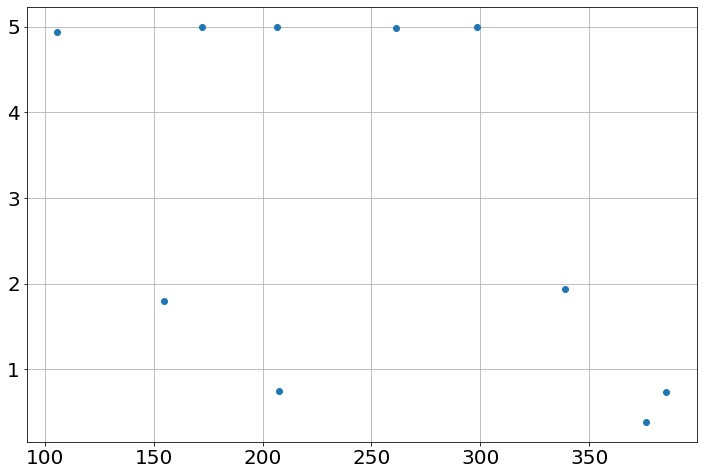

In [35]:
plot(a,c,'o')

<ErrorbarContainer object of 3 artists>

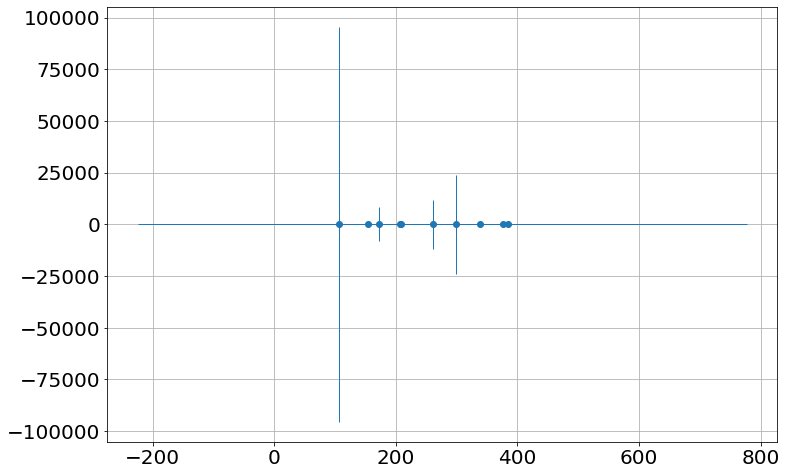

In [38]:
errorbar(x=a,y=c,xerr=σa,yerr=σc,fmt='o',elinewidth=1)


(-20.0, 20.0)

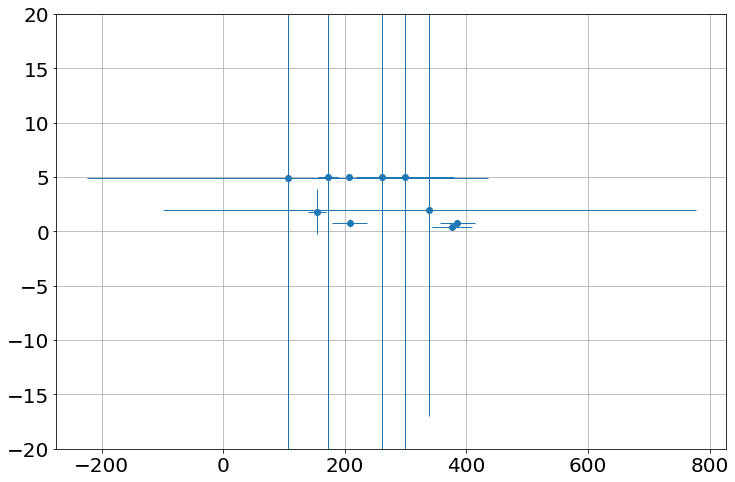

In [39]:
errorbar(x=a,y=c,yerr=σc,xerr=σa,fmt='o',elinewidth=1)
ylim([-20,20])

Text(0, 0.9, 'y errorbars are 3σ')

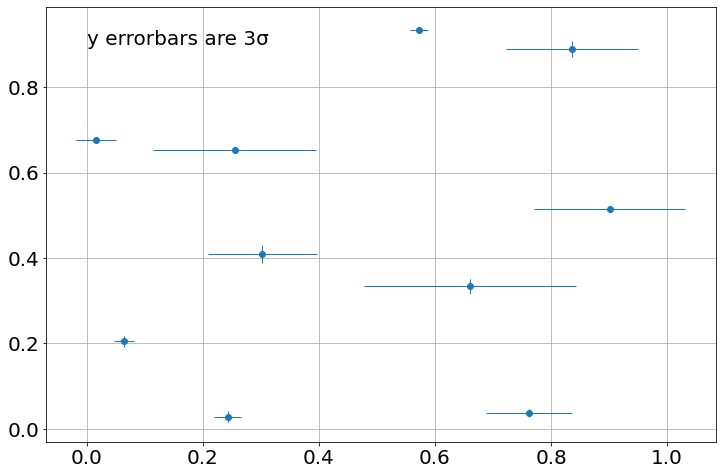

In [48]:
x=rand(10)
y=rand(10)

xerr=.2*rand(10)
yerr=.01*rand(10)

errorbar(x,y,xerr=xerr,yerr=3*yerr,fmt='o',elinewidth=1)
text(0,.9,"y errorbars are 3σ")